In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf 

from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import boston_housing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
tf.__version__

'2.2.0'

In [63]:
# First we can load the dataset 
(X_train,Y_train) , (X_test,Y_test) = boston_housing.load_data()

In [64]:
pd.DataFrame(X_train).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41


In [68]:
# First we normalize our dataset 
scalar = StandardScaler()
scalar.fit(X_train)
X_train_norm = scalar.transform(X_train)
X_test_norm = scalar.transform(X_test)

In [66]:
pd.DataFrame(X_train_norm).head(20)
#pd.DataFrame(Y_train_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497
5,-0.375022,-0.483615,-0.547479,-0.256833,-0.549357,-0.788651,0.189541,0.483715,-0.511142,-0.715530,0.511458,0.386691,-0.138128
6,0.589635,-0.483615,1.028326,-0.256833,1.217641,-1.031278,1.110488,-1.065182,1.675886,1.565287,0.784476,0.448077,1.498736
7,0.038171,-0.483615,1.245881,-0.256833,2.677335,-1.127200,1.110488,-1.148331,-0.511142,-0.017443,-1.718189,0.448077,1.887940
8,-0.172284,-0.483615,1.245881,-0.256833,2.677335,-0.901501,1.110488,-1.096647,-0.511142,-0.017443,-1.718189,-1.973658,0.539528
9,-0.229321,-0.483615,1.585443,-0.256833,0.568888,-1.760568,1.110488,-1.134719,-0.626249,0.187168,1.239506,0.448077,2.990684


In [69]:
pd.DataFrame(X_test_norm).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.553694,-0.483615,1.028326,-0.256833,1.038381,0.235458,1.110488,-0.939769,1.675886,1.565287,0.784476,-3.484596,2.250921
1,-0.392427,-0.483615,-0.160878,-0.256833,-0.088401,-0.499474,0.856063,-0.683962,-0.396036,0.157078,-0.307596,0.427331,0.478801
2,-0.399829,-0.483615,-0.869402,-0.256833,-0.361560,-0.397910,-0.846076,0.528643,-0.511142,-1.094663,0.784476,0.448077,-0.414159
3,-0.267805,-0.483615,1.245881,3.893584,0.406700,-0.024096,0.845313,-0.957671,-0.511142,-0.017443,-1.718189,-0.168767,-0.999345
4,-0.398037,-0.483615,-0.972300,-0.256833,-0.924950,-0.206066,-0.437562,0.003615,-0.741356,-0.956249,0.010925,0.429459,-0.593580
5,-0.375494,-0.483615,-0.207917,-0.256833,0.235976,-0.481136,-0.946412,-0.670006,-0.396036,-0.089659,0.329446,0.448077,0.117200
6,-0.402482,1.833318,-1.076667,-0.256833,-0.626183,0.856131,-1.466013,1.343951,-0.511142,-0.216037,-0.398602,0.353072,-1.122179
7,-0.401938,0.569536,-0.917911,-0.256833,-1.121283,-0.141177,-0.799491,0.818873,-0.626249,-0.751638,0.238440,0.381478,-0.721934
8,-0.395710,-0.483615,2.138151,-0.256833,0.201831,-0.431765,0.856063,-0.815392,-0.856463,-1.311311,0.283943,0.247959,0.716188
9,-0.019116,-0.483615,1.028326,-0.256833,0.193295,0.239690,0.214626,-0.416122,1.675886,1.565287,0.784476,0.410522,0.223472


In [108]:
# Now we define our model 
def createModel(HLno=1,HLneuron=[500],HLActv=['relu'],optimizr='adam',l='mean_squared_error'):
    '''
    HLno : Hidden Layer Number 
    HLneuron : No of neurons in each Hidden Layer as list of values 
    HLActiv : activation function of each layer 
    l : loss 
    optimizr : optimizer 
    '''
    # create Sequential object 
    model = Sequential()
    for i in range(HLno):
        if i == 0:
            model.add(Dense(HLneuron[i],input_dim=13,activation=HLActv[i]))
        else:
            model.add(Dense(HLneuron[i],activation=HLActv[i]))
    model.add(Dense(1))
    
    model.compile(loss=l,optimizer=optimizr)
    return model 

def plot_history(history):
    plt.figure(figsize=(20,10))
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.ylim(0,20)
    plt.plot(history.epoch,np.array(history.history['val_loss']),label='validation-loss')
    plt.plot(history.epoch,np.array(history.history['loss']),label='training-loss')
    plt.legend()
    plt.show()

In [113]:
model = createModel(HLno=1,HLneuron=[1000],HLActv=['relu'],optimizr='adam')
model.summary()
history = model.fit(X_train_norm,Y_train,epochs=500,batch_size=5,validation_split=0.2,validation_data=(X_test_norm,Y_test))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 1000)              14000     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 1001      
Total params: 15,001
Trainable params: 15,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
65/65 [==============================] - 0s 2ms/step - loss: 396.9759 - val_loss: 235.8959
Epoch 2/500
65/65 [==============================] - 0s 1ms/step - loss: 90.2487 - val_loss: 63.5246
Epoch 3/500
65/65 [==============================] - 0s 1ms/step - loss: 35.4876 - val_loss: 35.5453
Epoch 4/500
65/65 [==============================] - 0s 1ms/step - loss: 26.2372 - val_loss: 27.8646
Epoch 5/500
65/65 [==============================] - 0s 1ms/step - loss: 22.2677 - val_loss: 24.4970
Epoc

Epoch 76/500
65/65 [==============================] - 0s 1ms/step - loss: 4.5839 - val_loss: 10.8431
Epoch 77/500
65/65 [==============================] - 0s 1ms/step - loss: 4.9127 - val_loss: 10.9986
Epoch 78/500
65/65 [==============================] - 0s 1ms/step - loss: 4.6076 - val_loss: 10.7687
Epoch 79/500
65/65 [==============================] - 0s 1ms/step - loss: 4.8705 - val_loss: 12.4684
Epoch 80/500
65/65 [==============================] - 0s 1ms/step - loss: 4.9695 - val_loss: 10.9816
Epoch 81/500
65/65 [==============================] - 0s 1ms/step - loss: 4.6946 - val_loss: 10.2125
Epoch 82/500
65/65 [==============================] - 0s 1ms/step - loss: 4.4603 - val_loss: 10.9519
Epoch 83/500
65/65 [==============================] - 0s 1ms/step - loss: 4.9663 - val_loss: 10.4173
Epoch 84/500
65/65 [==============================] - 0s 2ms/step - loss: 4.7753 - val_loss: 10.5306
Epoch 85/500
65/65 [==============================] - 0s 1ms/step - loss: 4.3695 - val_loss

Epoch 157/500
65/65 [==============================] - 0s 1ms/step - loss: 2.8701 - val_loss: 9.0846
Epoch 158/500
65/65 [==============================] - 0s 1ms/step - loss: 2.7826 - val_loss: 9.4122
Epoch 159/500
65/65 [==============================] - 0s 1ms/step - loss: 2.7021 - val_loss: 9.3511
Epoch 160/500
65/65 [==============================] - 0s 1ms/step - loss: 2.6209 - val_loss: 8.7518
Epoch 161/500
65/65 [==============================] - 0s 1ms/step - loss: 2.5612 - val_loss: 9.4953
Epoch 162/500
65/65 [==============================] - 0s 1ms/step - loss: 2.5562 - val_loss: 9.5252
Epoch 163/500
65/65 [==============================] - 0s 1ms/step - loss: 2.8938 - val_loss: 10.2898
Epoch 164/500
65/65 [==============================] - 0s 1ms/step - loss: 2.6131 - val_loss: 9.2704
Epoch 165/500
65/65 [==============================] - 0s 1ms/step - loss: 2.7982 - val_loss: 9.1625
Epoch 166/500
65/65 [==============================] - 0s 1ms/step - loss: 2.7394 - val_lo

Epoch 238/500
65/65 [==============================] - 0s 1ms/step - loss: 1.7696 - val_loss: 8.8487
Epoch 239/500
65/65 [==============================] - 0s 1ms/step - loss: 1.7262 - val_loss: 8.4978
Epoch 240/500
65/65 [==============================] - 0s 1ms/step - loss: 1.9376 - val_loss: 9.6943
Epoch 241/500
65/65 [==============================] - 0s 1ms/step - loss: 2.5693 - val_loss: 9.1327
Epoch 242/500
65/65 [==============================] - 0s 2ms/step - loss: 1.8681 - val_loss: 9.2767
Epoch 243/500
65/65 [==============================] - 0s 1ms/step - loss: 1.9052 - val_loss: 9.5063
Epoch 244/500
65/65 [==============================] - 0s 1ms/step - loss: 1.6379 - val_loss: 8.4877
Epoch 245/500
65/65 [==============================] - 0s 1ms/step - loss: 1.6129 - val_loss: 9.6068
Epoch 246/500
65/65 [==============================] - 0s 1ms/step - loss: 1.6809 - val_loss: 8.6270
Epoch 247/500
65/65 [==============================] - 0s 1ms/step - loss: 1.9490 - val_los

65/65 [==============================] - 0s 1ms/step - loss: 1.4513 - val_loss: 8.3509
Epoch 320/500
65/65 [==============================] - 0s 1ms/step - loss: 1.6159 - val_loss: 8.4881
Epoch 321/500
65/65 [==============================] - 0s 1ms/step - loss: 1.2383 - val_loss: 8.5414
Epoch 322/500
65/65 [==============================] - 0s 2ms/step - loss: 1.1705 - val_loss: 8.9068
Epoch 323/500
65/65 [==============================] - 0s 1ms/step - loss: 1.1496 - val_loss: 9.5046
Epoch 324/500
65/65 [==============================] - 0s 1ms/step - loss: 1.2051 - val_loss: 8.6951
Epoch 325/500
65/65 [==============================] - 0s 1ms/step - loss: 1.1598 - val_loss: 9.2163
Epoch 326/500
65/65 [==============================] - 0s 1ms/step - loss: 1.2785 - val_loss: 9.1354
Epoch 327/500
65/65 [==============================] - 0s 1ms/step - loss: 1.6874 - val_loss: 9.8135
Epoch 328/500
65/65 [==============================] - 0s 1ms/step - loss: 1.3562 - val_loss: 8.5575
Epoc

65/65 [==============================] - 0s 1ms/step - loss: 0.5693 - val_loss: 9.7965
Epoch 482/500
65/65 [==============================] - 0s 2ms/step - loss: 0.6988 - val_loss: 9.8709
Epoch 483/500
65/65 [==============================] - 0s 1ms/step - loss: 0.7284 - val_loss: 10.0149
Epoch 484/500
65/65 [==============================] - 0s 1ms/step - loss: 0.6648 - val_loss: 10.3226
Epoch 485/500
65/65 [==============================] - 0s 1ms/step - loss: 0.7090 - val_loss: 9.8054
Epoch 486/500
65/65 [==============================] - 0s 1ms/step - loss: 0.6053 - val_loss: 10.0797
Epoch 487/500
65/65 [==============================] - 0s 1ms/step - loss: 0.6750 - val_loss: 9.7129
Epoch 488/500
65/65 [==============================] - 0s 1ms/step - loss: 0.7021 - val_loss: 11.0902
Epoch 489/500
65/65 [==============================] - 0s 1ms/step - loss: 0.9454 - val_loss: 10.5248
Epoch 490/500
65/65 [==============================] - 0s 1ms/step - loss: 1.1509 - val_loss: 9.8815

In [114]:
model.evaluate(X_test_norm,Y_test)

4/4 [==============================] - 0s 1ms/step - loss: 12.0627


12.062710762023926

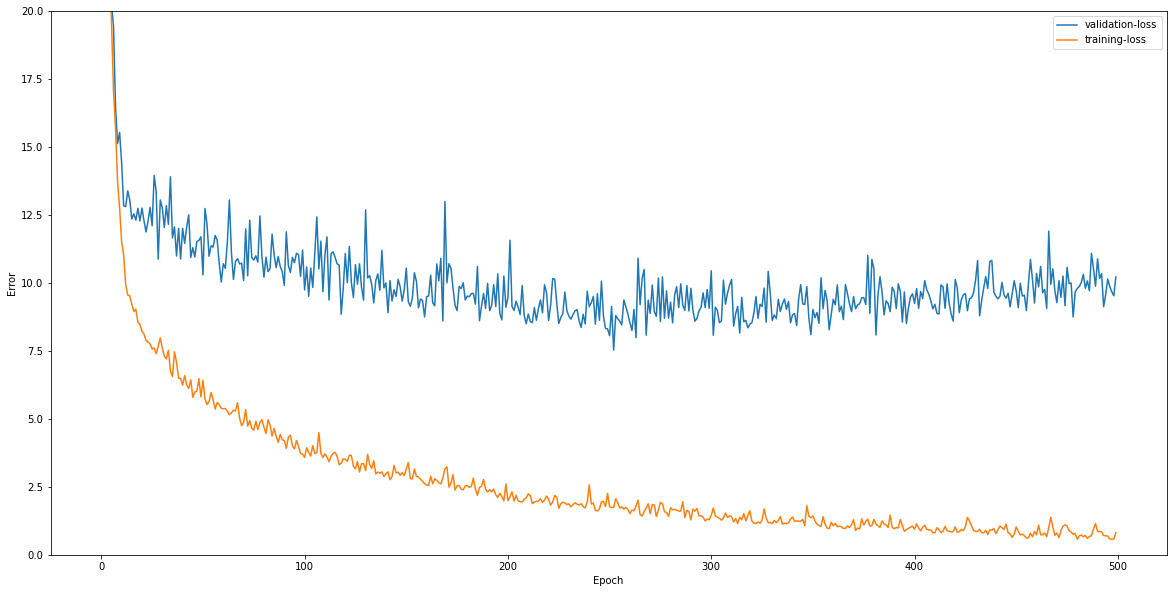

In [115]:
plot_history(history)

In [100]:
pd.DataFrame(history.history)

,loss,val_loss
0,350.076202,136.897430
1,57.941189,31.787733
2,25.408382,20.807440
3,19.945257,18.381607
4,16.799948,17.542858
...,...,...
495,0.717194,14.890337
496,0.629811,15.198309
497,0.588022,13.232223
498,0.558554,14.560653
